# Denison DA210/CS181 Project Deliverable #3: Data Storage and Analysis

### Authors: Ashwin Krishnamurthy, Lam Do

Central Question: What countries have the best public and professional film success rates?

We will answer this question by analyzing three tables with information about countries (except from the US), the number of films the country produced, the number of box office tickets it sold, and the number of awards it received. Additionally, after some review, we decided to add in the data sets indicators and countries from the textbook `Introduction to Data Systems` by Dr. Bressoud and Dr. White.

---

In [232]:
import os
import os.path
import pandas as pd
from lxml import etree
import json
import sqlalchemy as sa
datadir = "data"

---
# Part A: Overview of the datasets
### I. Largest industries by number of film productions

Citation: https://en.wikipedia.org/api/rest_v1/page/html/Film_industry

There are 4 columns and 15 rows in this data set

Columns: Rank (int), Country (string), Films (int) and Year (int)

### II. Largest markets by number of box office admissions 

Citation: https://en.wikipedia.org/api/rest_v1/page/html/Film_industry

There are 4 columns and 10 rows in this data set

Columns: Rank (int), Country (string), Number of Admissions (int) and Year (int)

### III. Academy Awards for Best International Feature Film tally by country

Citation: https://en.wikipedia.org/api/rest_v1/page/html/List_of_countries_by_number_of_Academy_Awards_for_Best_International_Feature_Film

There are 6 columns and approximately 100 rows in this data set

Columns: Submitting country (string), Number of winning films (int), Number of nominated films (int), Number of submitted films (int), First submitted (int), Last submitted (int)

### IV. Additional information

Understanding the public and professional success rate of films is important for the movie industry for several reasons. The number of film productions indicate the efforts of the filmmaking community in the country to better their industry. The number of box office admissions provide insights into film's financial viability. The number of Academy Awards for Best International Feature Film measures the critical reception of the film and its impact on the industry. 

These data sets are eligible for scraping because they are on Wikipedia. The Wikipedia Terms of Use states that the Wikimedia Foundation is dedicated to host the full content of wiki-based projects for the public free of charge.

After submitting the 2nd deliverable, we decide to bring in indicators and countries data set from the textbook `Introduction to Data Systems` by Dr. Bressoud and Dr. White. We have yet to find an official document that legalizes the use of data from the textbook, but we believe that these data sets are eligible for educational usage.

---
# Part B: Parsing data

### I. Largest industries by number of film productions

The process to scrape this dataset is quite straightforward, in which we first obtain the HTML tree and its root, find the table that we want, getting the column names and values of each columns. There was not much difficulty in this practice. 

The only small problem we encountered was the commas in the `films_values`, which we removed using .replace()

In [233]:
#getting the tree and the root of the FilmIndustry.html file
path = "data/FilmIndustry.html"
htmlparser = etree.HTMLParser()
tree = etree.parse(path, parser = htmlparser)
filmroot = tree.getroot()

In [234]:
#find all table nodes
table_nodes = filmroot.xpath("//table[@class='wikitable sortable']")
table_nodes

[<Element table at 0x7fd2a82eb040>,
 <Element table at 0x7fd2a8615e80>,
 <Element table at 0x7fd2a872b380>]

In [235]:
#choose the first table node
table_node = table_nodes[0]

#find all column names
column_names = table_node.xpath(".//th/text()")
column_names

['Rank', 'Country', 'Films', 'Year']

In [236]:
#find all values of the rank column
rank_values = table_node.xpath(".//td[position()=1]/text()")
rank_values

#convert values of strings to integers
rank_values = [int(v) for v in rank_values]
rank_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [237]:
#find all values of the country column
country_values = table_node.xpath(".//td[position()=2]/a/text()")
country_values

['India',
 'Nigeria',
 'China',
 'Japan',
 'United States',
 'South Korea',
 'France',
 'United Kingdom',
 'Spain',
 'Germany',
 'Argentina',
 'Mexico',
 'Italy',
 'Brazil',
 'Turkey']

In [238]:
#find all values of the film column
films_values = table_node.xpath(".//td[position()=3]/text()")

#removing the commas and convert strings to integers
films_values[0] = films_values[0].replace(",", "")
films_values[1] = films_values[1].replace(",", "")
films_values = [int(v) for v in films_values]
films_values

[2446, 1599, 874, 689, 660, 339, 300, 285, 241, 233, 220, 176, 173, 160, 148]

In [239]:
#find all values of the year column
year_values = table_node.xpath(".//td[position()=4]/text()")

#convert strings to integers
year_values = [int(v) for v in year_values]
year_values

[2019,
 2019,
 2017,
 2019,
 2017,
 2016,
 2017,
 2017,
 2017,
 2017,
 2015,
 2017,
 2017,
 2017,
 2017]

In [240]:
#putting the column names as keys and values in the columns as values, convert the DoL to a DataFrame
df1 = pd.DataFrame({column_names[0]: rank_values, column_names[1]: country_values, column_names[2]: films_values, column_names[3]: year_values})
df1

,Rank,Country,Films,Year
0,1,India,2446,2019
1,2,Nigeria,1599,2019
2,3,China,874,2017
3,4,Japan,689,2019
4,5,United States,660,2017
5,6,South Korea,339,2016
6,7,France,300,2017
7,8,United Kingdom,285,2017
8,9,Spain,241,2017
9,10,Germany,233,2017


There are 4 columns and 15 rows in this data set. We plan to use the columns `Country` and `Films`.

### II. Largest industries by number of box office admissions

The process to scrape this data set was entirely similar to that of the last data set, with identical problems.

In [241]:
#find all table nodes
table_nodes = filmroot.xpath("//table[@class='wikitable sortable']")
table_nodes

[<Element table at 0x7fd2a82eb040>,
 <Element table at 0x7fd2a8615e80>,
 <Element table at 0x7fd2a872b380>]

In [242]:
#choose the third table node
table_node = table_nodes[2]

#find all column names
column_names = table_node.xpath(".//th/text()")
column_names

['Rank', 'Country', 'Number of admissions', '(millions of tickets)', 'Year']

In [243]:
#remove '(millions of tickets)' because it is not a column
if len(column_names) != 4:
    column_names.remove("(millions of tickets)")
column_names

['Rank', 'Country', 'Number of admissions', 'Year']

In [244]:
#find all values of the rank column
rank_values = table_node.xpath(".//td[position()=1]/text()")

#convert strings to integers
rank_values = [int(rank) for rank in rank_values]
rank_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [245]:
#find all values of the country column
country_values = table_node.xpath(".//td[position()=2]/a/@title")
country_values

['China',
 'India',
 'United States',
 'Mexico',
 'South Korea',
 'Russia',
 'France',
 'Japan',
 'Brazil',
 'United Kingdom']

In [246]:
#find all values of the Number of Admissions column
num_admissions_list = table_node.xpath(".//td[position()=3]/text()")

#convert strings to integers
num_admissions_values = [int(admission.replace(",","")) for admission in num_admissions_list]
num_admissions_values

[1650, 1514, 1170, 352, 239, 209, 205, 194, 177, 175]

In [247]:
#find all values of the year column
year_list = table_node.xpath(".//td[position()=4]/text()")

#convert strings to integers
year_values = [int(year) for year in year_list]
year_values

[2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]

In [248]:
#construct the DoL
DoL = {column_names[0]: rank_values, column_names[1]: country_values, 
                  column_names[2]: num_admissions_values, column_names[3]: year_values}

#build a DataFrame based on the DoL
df2 = pd.DataFrame(DoL)
df2

,Rank,Country,Number of admissions,Year
0,1,China,1650,2019
1,2,India,1514,2019
2,3,United States,1170,2019
3,4,Mexico,352,2019
4,5,South Korea,239,2019
5,6,Russia,209,2019
6,7,France,205,2019
7,8,Japan,194,2019
8,9,Brazil,177,2019
9,10,United Kingdom,175,2019


There are 4 columns and 10 rows in this data set. We plan to use the column `Country` and `Number of Admissions`.

### III. Academy Awards for Best International Feature Film tally by country

The process to scrape this data set was rather straightforward as well. The only problem we had was that the column names were a little messed up.

In [249]:
#getting the tree and root
path = "data/CountryOscarWinners.html"
htmlparser = etree.HTMLParser()
tree = etree.parse(path, parser = htmlparser)
oscarroot = tree.getroot()

In [250]:
#getting all table nodes
table_nodes = oscarroot.xpath("//table[@class='wikitable sortable']")
table_nodes

[<Element table at 0x7fd2b8c7a740>]

In [251]:
#get the table node from the list
table_node = table_nodes[0]
# there was a "br" in the column names that put text on the next line so it messed up the column names
column_names = table_node.xpath(".//th/text()")
column_names

['Submitting country',
 'Number of',
 'winning films',
 'Number of',
 'nominated films',
 'Number of',
 'submitted films',
 'First ',
 'submitted',
 'Last ',
 'submitted']

In [252]:
#get the values of the country column
country_values = table_node.xpath(".//td[position()=1]/a/text()")
country_values[:5]

['Italy', 'France', 'Japan', 'Spain', 'Denmark']

In [253]:
#get the values of winning column
winning_values = table_node.xpath(".//td[position()=2]/span[position()=3]/text()")

#convert to integers
winning_values = [int(v) for v in winning_values]
winning_values[:5]   

[14, 12, 5, 4, 4]

In [254]:
#get the values for nominated column
nominated_values = table_node.xpath(".//td[position()=3]//span[position()=3]/text()")

#convert to integers
nominated_values = [int(v) for v in nominated_values]
nominated_values[:5]

[32, 41, 17, 20, 14]

In [255]:
#get the values for submitted column
submitted_values = table_node.xpath(".//td[position()=4]/span[position()=3]/text()")

#convert to integers
submitted_values = [int(v) for v in submitted_values]
submitted_values[:5]

[69, 70, 69, 65, 60]

In [256]:
#get the value for first column
first_values = table_node.xpath(".//td[position()=5]/text()")

#convert to integers
first_values = [int(v) for v in first_values]
first_values[:5]

[1947, 1948, 1951, 1956, 1956]

In [257]:
#get the values for last column
last_values = table_node.xpath(".//td[position()=6]/text()")

#convert to integers
last_values = [int(v) for v in last_values]
last_values[:5]

[2022, 2022, 2022, 2022, 2022]

In [258]:
#build DataFrame
df3 = pd.DataFrame({"Country": country_values, "Number of Winning Films": winning_values, 
                   "Number of Nominated Films": nominated_values, "Number of Submitted Films": submitted_values, 
                  "First submitted year": first_values, "Last submitted year": last_values})
df3.head(5)

,Country,Number of Winning Films,Number of Nominated Films,Number of Submitted Films,First submitted year,Last submitted year
0,Italy,14,32,69,1947,2022
1,France,12,41,70,1948,2022
2,Japan,5,17,69,1951,2022
3,Spain,4,20,65,1956,2022
4,Denmark,4,14,60,1956,2022


There are 6 columns and 134 rows in this data set. 

We plan to use the columns `Country`, `Number of Winning Films`, `Number of Nominated Films`, `Number of Submitted Films`.

### IV. Addressing the central question (added after feedback)

We will join all the three tables of `Largest industries by number of film productions`, `Largest markets by number of box office admissions` and `Academy Awards for Best International Feature Film tally by country` together. We now have a single entity of films.

We will add a column calculating the country’s number of box office admissions per number of film productions. This variable would show the success rate of a country in terms of public recognition. Similarly, we will add a column calculating the country's number of Oscar nominations per number of films submitted. This variable would show the success rate of a country in terms of professional recognition.

Finally, we will analyze the values that measure public and professional recognition we created of countries and draw conclusions.

### V. Joining the tables we scraped with indicators

In [259]:
# Join the three tables we scraped using column "Country"
df12 = pd.merge(df1, df2, on = "Country", how = "inner")
df = pd.merge(df12, df3, on = "Country", how = "inner")
df = df[["Country", "Films", "Number of admissions", "Number of Winning Films", "Number of Nominated Films", "Number of Submitted Films"]]
df

,Country,Films,Number of admissions,Number of Winning Films,Number of Nominated Films,Number of Submitted Films
0,India,2446,1514,0,3,55
1,China,874,1650,0,2,36
2,Japan,689,194,5,17,69
3,South Korea,339,239,1,1,35
4,France,300,205,12,41,70
5,United Kingdom,285,175,0,2,19
6,Mexico,176,352,1,9,55
7,Brazil,160,177,0,4,52


In [260]:
# Create indicators data frame
filepath = "data/indicators.csv"
indicators = pd.read_csv(filepath)
indicators = indicators[indicators["year"] == 2016]
indicators = indicators.rename(columns = {"country": "Country"})
indicators

,code,year,Country,pop,gdp,life,cell
56,ABW,2016,Aruba,0.10,NaN,75.87,NaN
113,AFG,2016,Afghanistan,34.66,19.47,63.67,21.60
170,AGO,2016,Angola,28.81,95.34,61.55,13.00
227,ALB,2016,Albania,2.88,11.86,78.34,3.37
284,AND,2016,Andorra,0.08,2.86,NaN,0.07
...,...,...,...,...,...,...,...
12311,XKX,2016,Kosovo,1.82,6.65,71.65,NaN
12368,YEM,2016,"Yemen, Rep.",27.58,27.32,64.95,16.43
12425,ZAF,2016,South Africa,56.02,295.46,62.77,82.41
12482,ZMB,2016,Zambia,16.59,21.06,61.87,12.02


In [261]:
# Join our existing data frame with indicators
df = pd.merge(df, indicators, on = "Country", how = "inner")
df = df[["Country", "pop", "Films", "Number of Winning Films", "Number of Nominated Films", "Number of Submitted Films", "Number of admissions"]]
df = df.rename(columns = {"pop": "Population", "Films": "NumFilmsProd", "Number of Winning Films": "NumWinFilms", 
                          "Number of Nominated Films": "NumNomFilms", "Number of Submitted Films": "NumSubFilms",
                          "Number of admissions": "NumAdmissions"})
df


,Country,Population,NumFilmsProd,NumWinFilms,NumNomFilms,NumSubFilms,NumAdmissions
0,India,1324.17,2446,0,3,55,1514
1,China,1378.66,874,0,2,36,1650
2,Japan,126.99,689,5,17,69,194
3,France,66.89,300,12,41,70,205
4,United Kingdom,65.60,285,0,2,19,175
5,Mexico,127.54,176,1,9,55,352
6,Brazil,207.65,160,0,4,52,177


The table above is tidy. We will do analysis with it.

### VI. ONTO SQL !

Now that we have the pandas DataFrame of films, we will now put it in a SQL database named `films.db`

In [262]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [263]:
def buildConnectionString(source="sqlite"):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

In [264]:
# Build the conection string
cstring = buildConnectionString("sqlite")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///dbfiles/films.db


At this point, we have successfully build the connection to an empty database: `films.db`. In the following code cell, we execute a statement to create SQL `films` table.

In [265]:
statement = """
CREATE TABLE IF NOT EXISTS films (
Country VARCHAR(64) NOT NULL,
Population FLOAT,
NumFilmsProd INT,
NumWinFilms INT,
NumNomFilms FLOAT,
NumSubFilms FLOAT,
NumAdmissions INT,
PRIMARY KEY (Country)
)
"""
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of films failed:", str(err))

We now put data from pandas DataFrame `df` we constructed earlier to SQL `films` table.

In [266]:
#df.to_sql("films", con=connection, if_exists="append",index=False)

It's a success! We now have the `films` table in the `films` database in SQL. In the following code cells, we will create a `countries` table in the `films` database, read countries data from CSV to pandas DataFrame, and convert the pandas DataFrame to SQL table.

In the process of getting SQL `countries` table, we encounter some difficulties. Although the process was roughly similar to what we have above (add in the pandas DataFrame from csv file like indicators, creating SQL table like films), we did not fully grasp the idea of creating SQL tables. 

We initially copied the `countries` table from `book.db` and moved on to data analysis with that. That is not a logical thing to do, as we did not manually create a `countries` table, leading to this notebook of data acquisition being insufficient to acquire all the tables we need for analysis. After thinking about it, we went back to this notebook of data acquisition and add in the code to get `countries` table.

In [267]:
statement = """
CREATE TABLE IF NOT EXISTS countries (
code CHAR(3) NOT NULL,
Country VARCHAR(64),
currency VARCHAR(64),
region VARCHAR(64),
income FLOAT,
PRIMARY KEY (code)
)
"""
try:
    connection.execute(statement)
except sa.exc.SQLAlchemyError as err:
    print("CREATE of films failed:", str(err))

In [268]:
# Create countries data frame
filepath = os.path.join(datadir, "countries.csv")
df2 = pd.read_csv(filepath)
df2 = df2.rename(columns = {"ccode": "code", "name": "Country"})
df2

,code,Country,currency,region,income
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income
1,AFG,Afghanistan,Afghan afghani,South Asia,Low income
2,AGO,Angola,Angolan kwanza,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Albanian lek,Europe & Central Asia,Upper middle income
4,AND,Andorra,Euro,Europe & Central Asia,High income
...,...,...,...,...,...
212,XKX,Kosovo,Euro,Europe & Central Asia,Upper middle income
213,YEM,Yemen,Yemeni rial,Middle East & North Africa,Low income
214,ZAF,South Africa,South African rand,Sub-Saharan Africa,Upper middle income
215,ZMB,Zambia,New Zambian kwacha,Sub-Saharan Africa,Lower middle income


In [269]:
#df2.to_sql("countries", con=connection, if_exists="append",index=False)

---
### VII. Display tables using SQL query

In [270]:
query = """
SELECT *
FROM films
"""
df_q1 = pd.read_sql_query(query, con=connection)
df_q1

,Country,Population,NumFilmsProd,NumWinFilms,NumNomFilms,NumSubFilms,NumAdmissions
0,India,1324.17,2446,0,3.0,55.0,1514
1,China,1378.66,874,0,2.0,36.0,1650
2,Japan,126.99,689,5,17.0,69.0,194
3,France,66.89,300,12,41.0,70.0,205
4,United Kingdom,65.60,285,0,2.0,19.0,175
5,Mexico,127.54,176,1,9.0,55.0,352
6,Brazil,207.65,160,0,4.0,52.0,177


In [271]:
query = """
SELECT *
FROM countries
"""
df_q2 = pd.read_sql_query(query, con=connection)
df_q2.head(5)

,code,Country,currency,region,income
0,ABW,Aruba,Aruban florin,Latin America & Caribbean,High income
1,AFG,Afghanistan,Afghan afghani,South Asia,Low income
2,AGO,Angola,Angolan kwanza,Sub-Saharan Africa,Lower middle income
3,ALB,Albania,Albanian lek,Europe & Central Asia,Upper middle income
4,AND,Andorra,Euro,Europe & Central Asia,High income


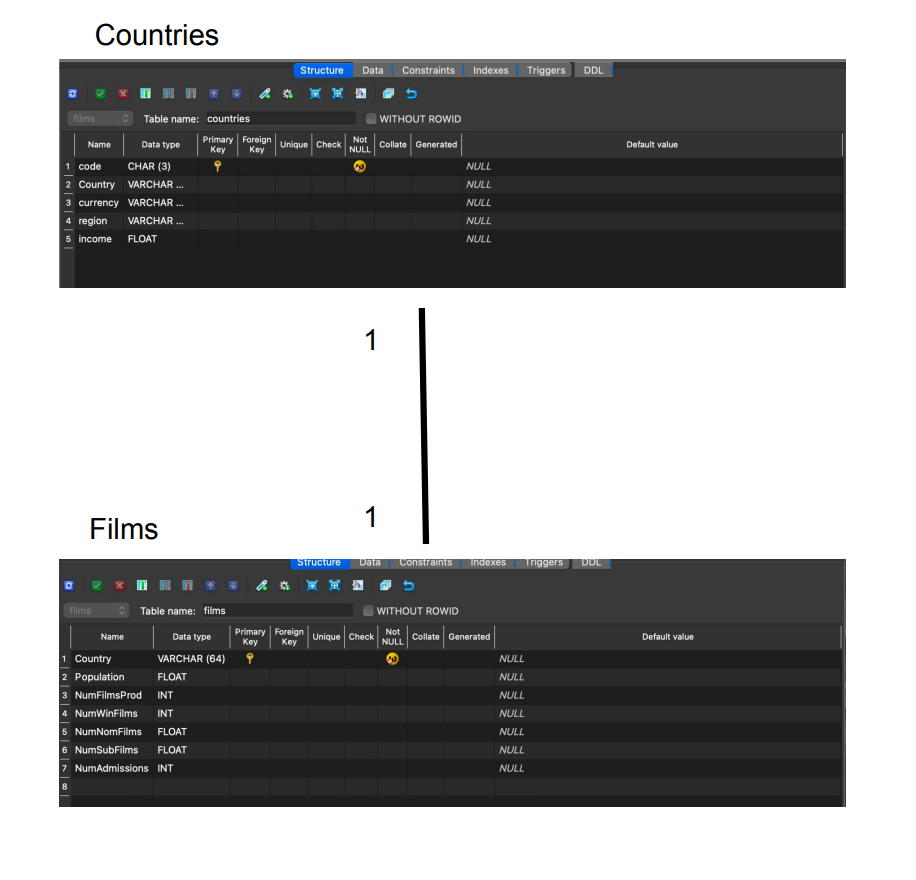

In [272]:
from IPython.display import Image
Image("figs/diagram.png", width=600, height=600)

We believe that our database design adheres to the Good DB Design, with a one-to-one relationship between 2 tables. We could have deleted `Code` and set `Country` as primary key in `countries` table. That way, we will more clearly see the one-to-one relationship. However, due to time constraint, we decide to leave `Code` as primary key and understand that a row in `countries` can only correspond to a row in `films` and vice versa.

This one-to-one relationship is acceptable because the relationship only exists sometimes. There are only 7 countries in `films` table, but there are over 200 countries in `countries` table. 

Another reason we kept them separate is that we want to perform an INNER JOIN in queries in data_analysis. Keeping the tables separate will make performing an INNER JOIN in queries easier for us!